# Importing libraries

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Load csv in a database and extract data

In [2]:
conn = sqlite3.connect('test.db')
c = conn.cursor()

In [3]:
df = pd.read_csv('NYMEX_DL_NG1!, 1M_b643a.csv')
df.to_sql('NG', con=conn)

300

## Correzione timestamp

In [4]:
s_time = pd.to_datetime(df['time'], unit='s')

In [5]:
df = pd.read_sql('SELECT open,high,low,close FROM NG', conn)
df

,open,high,low,close
0,3.180,3.850,2.840,3.552
1,3.570,3.610,2.515,2.578
2,2.660,2.810,2.140,2.264
3,2.200,2.280,1.970,2.257
4,2.220,2.430,2.150,2.321
...,...,...,...,...
295,7.412,9.447,6.430,8.145
296,8.271,9.664,5.357,5.424
297,5.701,9.752,5.325,8.229
298,7.910,10.028,7.532,9.127


## Creazione due collone per ulteriori info utili

In [6]:
#Profitt loss
pl = df['close']-df['open']
df['p/l'] = pl
#Variance in one month
va = df['high']-df['low']
df['va'] = va
#time
df['time'] = s_time
df.head(10)

,open,high,low,close,p/l,va,time
0,3.180,3.850,2.840,3.552,0.372,1.010,1997-09-30 22:00:00
1,3.570,3.610,2.515,2.578,-0.992,1.095,1997-11-02 23:00:00
2,2.660,2.810,2.140,2.264,-0.396,0.670,1997-11-30 23:00:00
3,2.200,2.280,1.970,2.257,0.057,0.310,1997-12-31 23:00:00
4,2.220,2.430,2.150,2.321,0.101,0.280,1998-02-01 23:00:00
5,2.335,2.535,2.105,2.522,0.187,0.430,1998-03-01 23:00:00
6,2.525,2.725,2.152,2.221,-0.304,0.573,1998-03-31 23:00:00
7,2.240,2.285,1.990,2.170,-0.070,0.295,1998-04-30 22:00:00
8,2.145,2.485,1.915,2.469,0.324,0.570,1998-05-31 22:00:00
9,2.480,2.520,1.835,1.844,-0.636,0.685,1998-06-30 22:00:00


# Correzione errori con le date (mesi)

In [7]:
my_list =  pd.to_datetime(df['time'], format='%Y-%m-%d')
year = my_list.dt.year
day = my_list.dt.day
fake_month = my_list.dt.month

In [8]:
import numpy as np
y = np.zeros(300)
m = np.zeros(300)
for i in range(300):
    if day[i]>5:
        y[i] = year[i]
        m[i] = fake_month[i] + 1
        #print(year[i],day[i],fake_month[i],m[i],y[i])
    else:
        y[i] = year[i]
        m[i] = fake_month[i]
    if m[i]==13:
        y[i] = year[i] + 1
        m[i] = 1
        #print(year[i],day[i],fake_month[i],m[i],y[i])
df['year']=y
df['month']=m

In [9]:
df.head(1)

,open,high,low,close,p/l,va,time,year,month
0,3.18,3.85,2.84,3.552,0.372,1.01,1997-09-30 22:00:00,1997.0,10.0


# Creazione Tabella riassuntiva performance
## Mese da 0 a 11 (Gennaio - Dicembre)
## Da anno 1998 a 2021

In [10]:
#mettiamo tutti i passaggi assieme
df_corr=pd.DataFrame()
for i in range(1998,2021,1):
    filtered_df = df[df['year'] == i]
    df_corr[i] = list(filtered_df['p/l'])
df_corr.T.iloc[1:,:]

,0,1,2,3,4,5,6,7,8,9,10,11
1999,-0.245,-0.100,0.370,0.293,0.128,0.025,0.240,0.320,-0.025,0.200,-0.580,0.045
2000,0.385,0.075,0.200,0.201,1.190,0.075,-0.495,1.005,0.450,-0.800,1.970,2.975
2001,-3.000,-0.625,-0.190,-0.255,-0.666,-0.789,0.236,-0.870,-0.036,1.111,-0.609,-0.060
2002,-0.340,0.255,0.820,0.555,-0.543,0.015,-0.306,0.316,0.960,-0.034,0.085,0.604
2003,0.635,2.601,-2.440,0.335,0.890,-0.839,-0.687,0.021,0.130,0.123,-0.050,1.290
2004,-0.928,-0.034,0.575,-0.043,0.580,-0.349,-0.043,-0.971,1.735,1.935,-1.205,-1.471
2005,0.372,0.420,0.932,-1.065,-0.141,0.601,0.905,3.572,2.502,-1.597,0.420,-1.395
2006,-1.384,-2.611,0.496,-0.645,-0.149,-0.335,2.121,-2.202,-0.270,1.928,1.244,-2.433
2007,1.462,-0.405,0.512,0.095,0.102,-1.182,-0.529,-0.733,1.430,1.470,-1.071,0.274
2008,0.502,1.301,0.714,0.810,0.783,1.562,-4.255,-1.180,-0.656,-0.735,-0.183,-0.928


In [11]:
df_corr.T.pct_change().round(2).iloc[1:,:]

,0,1,2,3,4,5,6,7,8,9,10,11
1999,-5.30,-1.99,0.98,-1.96,-2.83,-0.92,-1.38,-4.64,-1.04,-1.89,1.16,-0.47
2000,-2.57,-1.75,-0.46,-0.31,8.30,2.00,-3.06,2.14,-19.00,-5.00,-4.40,65.11
2001,-8.79,-9.33,-1.95,-2.27,-1.56,-11.52,-1.48,-1.87,-1.08,-2.39,-1.31,-1.02
2002,-0.89,-1.41,-5.32,-3.18,-0.18,-1.02,-2.30,-1.36,-27.67,-1.03,-1.14,-11.07
2003,-2.87,9.20,-3.98,-0.40,-2.64,-56.93,1.25,-0.93,-0.86,-4.62,-1.59,1.14
2004,-2.46,-1.01,-1.24,-1.13,-0.35,-0.58,-0.94,-47.24,12.35,14.73,23.10,-2.14
2005,-1.40,-13.35,0.62,23.77,-1.24,-2.72,-22.05,-4.68,0.44,-1.83,-1.35,-0.05
2006,-4.72,-7.22,-0.47,-0.39,0.06,-1.56,1.34,-1.62,-1.11,-2.21,1.96,0.74
2007,-2.06,-0.84,0.03,-1.15,-1.68,2.53,-1.25,-0.67,-6.30,-0.24,-1.86,-1.11
2008,-0.66,-4.21,0.39,7.53,6.68,-2.32,7.04,0.61,-1.46,-1.50,-0.83,-4.39


In [12]:
for month in df_corr.T.columns:
    count = 0
    changes = df_corr.T.iloc[:,month]
    for change in changes:
        if change >= 0:
            count += 1 

    perc = count/(len(changes)-1)*100
    print('perc positive nel mese {} è {:.2f} %'.format(month,perc))

perc positive nel mese 0 è 31.82 %
perc positive nel mese 1 è 40.91 %
perc positive nel mese 2 è 63.64 %
perc positive nel mese 3 è 72.73 %
perc positive nel mese 4 è 50.00 %
perc positive nel mese 5 è 45.45 %
perc positive nel mese 6 è 31.82 %
perc positive nel mese 7 è 54.55 %
perc positive nel mese 8 è 63.64 %
perc positive nel mese 9 è 68.18 %
perc positive nel mese 10 è 45.45 %
perc positive nel mese 11 è 50.00 %


In [13]:
for month in df_corr.T.columns:
    count = 0
    changes = df_corr.T.pct_change().round(2).iloc[:,month]
    for change in changes:
        if change <= 0:
            count += 1 

    perc = count/(len(changes)-1)*100
    print('perc negative nel mese {} è {:.2f} %'.format(month,perc))

perc negative nel mese 0 è 81.82 %
perc negative nel mese 1 è 81.82 %
perc negative nel mese 2 è 72.73 %
perc negative nel mese 3 è 72.73 %
perc negative nel mese 4 è 86.36 %
perc negative nel mese 5 è 81.82 %
perc negative nel mese 6 è 77.27 %
perc negative nel mese 7 è 68.18 %
perc negative nel mese 8 è 90.91 %
perc negative nel mese 9 è 77.27 %
perc negative nel mese 10 è 72.73 %
perc negative nel mese 11 è 72.73 %


In [14]:
#Corr tra i mesi diversi con un anno di differenza
for i in range(11):
    r = np.corrcoef(df_corr.iloc[i], df_corr.iloc[i+1])
    print((r[0][1]).round(2))

0.45
-0.44
-0.11
0.2
0.21
-0.44
0.1
0.4
-0.05
-0.37
0.14


In [15]:
df_corr.iloc[0]

1998    0.057
1999   -0.245
2000    0.385
2001   -3.000
2002   -0.340
2003    0.635
2004   -0.928
2005    0.372
2006   -1.384
2007    1.462
2008    0.502
2009   -1.133
2010   -0.574
2011   -0.072
2012   -0.466
2013   -0.009
2014    0.711
2015   -0.154
2016   -0.068
2017   -0.451
2018   -0.035
2019   -0.107
2020   -0.343
Name: 0, dtype: float64

In [16]:
df_corr.iloc[0].mean()

-0.2254347826086956

<AxesSubplot:xlabel='2008', ylabel='2009'>

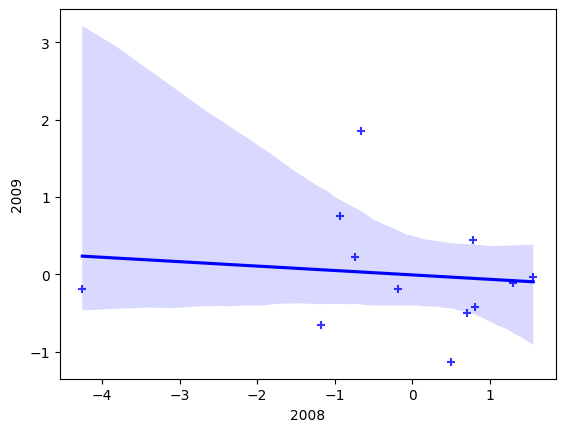

In [17]:
import seaborn as sns
i=10
sns.regplot(x=df_corr.T.iloc[i], y=df_corr.T.iloc[i+1], marker="+",fit_reg=True, color='blue')

In [18]:
df_corr.head(1)

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,0.057,-0.245,0.385,-3.0,-0.34,0.635,-0.928,0.372,-1.384,1.462,...,-0.072,-0.466,-0.009,0.711,-0.154,-0.068,-0.451,-0.035,-0.107,-0.343


## Grafico andamento medio annualizzato 1998-2021

In [19]:
my_list = np.zeros(12)
for i in range(12):
    my_list[i] = df_corr.iloc[i].mean().round(2)
my_list

array([-0.23, -0.05,  0.06,  0.07,  0.1 , -0.02, -0.19, -0.07,  0.39,
        0.23,  0.03, -0.14])

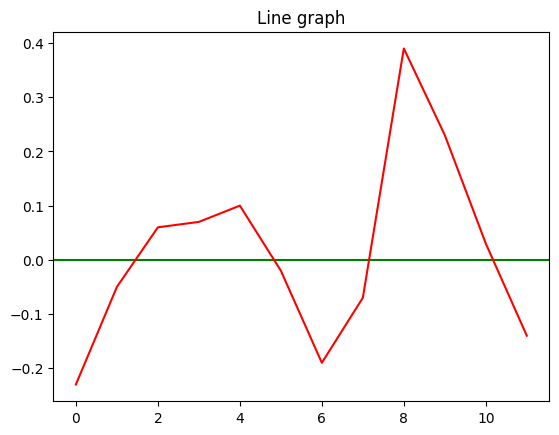

In [20]:
plt.title("Line graph")

x=np.arange(12)
y=my_list
plt.axhline(0, c='green')
plt.plot(x, y, color="red")

plt.show()

## Grafico andamento medio annualizzato 2001-2020 (20Y)

In [21]:
sub_df = df_corr.iloc[:,-20:]
sub_df.head(1)

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,-3.0,-0.34,0.635,-0.928,0.372,-1.384,1.462,0.502,-1.133,-0.574,-0.072,-0.466,-0.009,0.711,-0.154,-0.068,-0.451,-0.035,-0.107,-0.343


In [22]:
my_list_20y = np.zeros(12)
for i in range(12):
    my_list_20y[i] = sub_df.iloc[i].mean().round(2)
my_list_20y

array([-0.27, -0.06,  0.03,  0.07,  0.05, -0.04, -0.17, -0.14,  0.39,
        0.31, -0.03, -0.32])

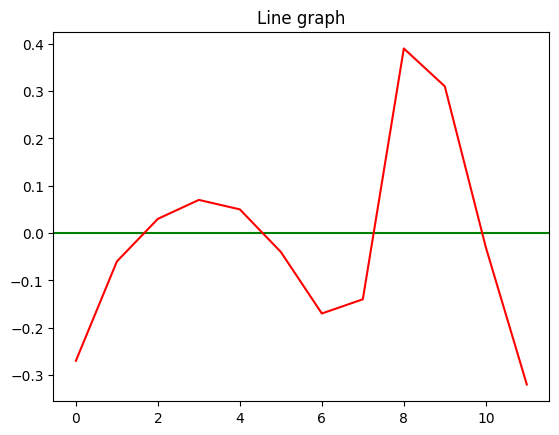

In [23]:
plt.title("Line graph")

x=np.arange(12)
y=my_list_20y
plt.axhline(0, c='green')
plt.plot(x, y, color="red")

plt.show()

## Grafico andamento medio annualizzato 2011-2020 (10Y)

In [24]:
sub_df = df_corr.iloc[:,-10:]
sub_df.head(1)

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,-0.072,-0.466,-0.009,0.711,-0.154,-0.068,-0.451,-0.035,-0.107,-0.343


In [25]:
my_list_10y = np.zeros(12)
for i in range(12):
    my_list_10y[i] = sub_df.iloc[i].mean().round(2)
my_list_10y

array([-0.1 , -0.16,  0.06,  0.19, -0.07,  0.02, -0.1 ,  0.11,  0.01,
        0.16,  0.09, -0.32])

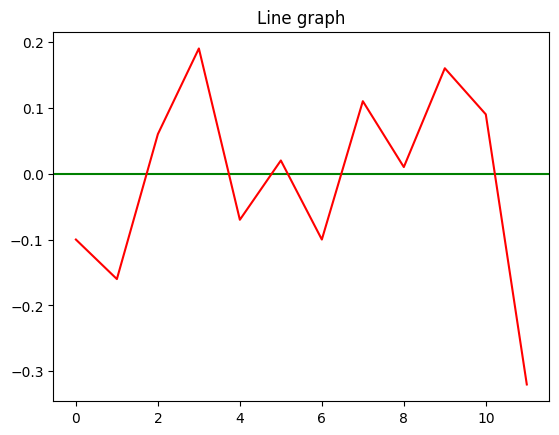

In [26]:
plt.title("Line graph")

x=np.arange(12)
y=my_list_10y
plt.axhline(0, c='green')
plt.plot(x, y, color="red")

plt.show()

## Grafico andamento medio annualizzato 2016-2020 (5Y)

In [27]:
sub_df = df_corr.iloc[:,-5:]
sub_df.head(1)

,2016,2017,2018,2019,2020
0,-0.068,-0.451,-0.035,-0.107,-0.343


In [28]:
my_list_5y = np.zeros(12)
for i in range(12):
    my_list_5y[i] = sub_df.iloc[i].mean().round(2)
my_list_5y

array([-0.2 , -0.27,  0.11,  0.1 , -0.01,  0.07, -0.08,  0.25,  0.02,
        0.27,  0.19, -0.35])

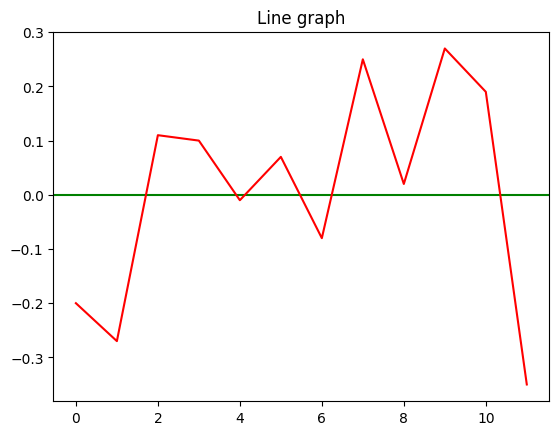

In [29]:
plt.title("Line graph")

x=np.arange(12)
y=my_list_5y
plt.axhline(0, c='green')
plt.plot(x, y, color="red")

plt.show()

## Grafico andamento medio annualizzato 2018-2020 (3Y)

In [30]:
sub_df = df_corr.iloc[:,-3:]
sub_df.head(1)

,2018,2019,2020
0,-0.035,-0.107,-0.343


In [31]:
my_list_3y = np.zeros(12)
for i in range(12):
    my_list_3y[i] = sub_df.iloc[i].mean().round(2)
my_list_3y

array([-0.16, -0.16, -0.04,  0.08, -0.01, -0.08, -0.06,  0.32,  0.03,
        0.46,  0.16, -0.69])

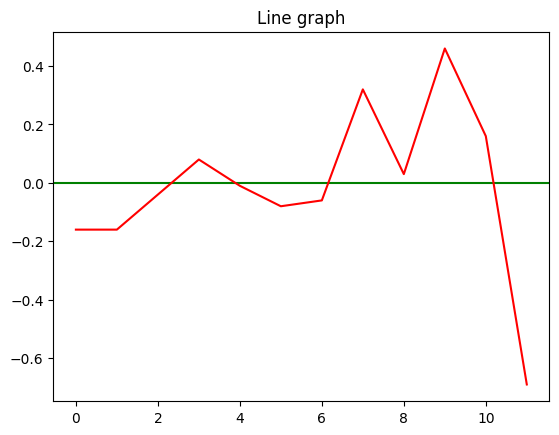

In [32]:
plt.title("Line graph")

x=np.arange(12)
y=my_list_3y
plt.axhline(0, c='green')
plt.plot(x, y, color="red")

plt.show()

In [33]:
# Sub dataset
df1 = df_corr.iloc[:,-20:]
df1['Ov_P'] = my_list # Mean Overall Perfomance 1998-2020
df1['20y_p'] = my_list_20y # Mean 20 years Perfomance 2001-2020
df1['10y_p'] = my_list_10y # Mean 10 years Perfomance 2011-2020
df1['5y_p'] = my_list_5y # Mean 5 years Perfomance 2016-2020
df1['3y_p'] = my_list_3y # Mean 3 years Perfomance 2018-2020
df1

/var/folders/pz/9t_qtksj6336tmb128gz21sm0000gn/T/ipykernel_35685/2989033186.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Ov_P'] = my_list # Mean Overall Perfomance 1998-2020
/var/folders/pz/9t_qtksj6336tmb128gz21sm0000gn/T/ipykernel_35685/2989033186.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['20y_p'] = my_list_20y # Mean 20 years Perfomance 2001-2020


,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2016,2017,2018,2019,2020,Ov_P,20y_p,10y_p,5y_p,3y_p
0,-3.000,-0.340,0.635,-0.928,0.372,-1.384,1.462,0.502,-1.133,-0.574,...,-0.068,-0.451,-0.035,-0.107,-0.343,-0.23,-0.27,-0.10,-0.20,-0.16
1,-0.625,0.255,2.601,-0.034,0.420,-2.611,-0.405,1.301,-0.112,-0.434,...,-0.502,-0.360,-0.289,-0.020,-0.168,-0.05,-0.06,-0.16,-0.27,-0.16
2,-0.190,0.820,-2.440,0.575,0.932,0.496,0.512,0.714,-0.498,-0.903,...,0.252,0.420,0.065,-0.132,-0.055,0.06,0.03,0.06,0.11,-0.04
3,-0.255,0.555,0.335,-0.043,-1.065,-0.645,0.095,0.810,-0.418,0.046,...,0.215,0.059,0.033,-0.096,0.306,0.07,0.07,0.19,0.10,0.08
4,-0.666,-0.543,0.890,0.580,-0.141,-0.149,0.102,0.783,0.442,0.406,...,0.156,-0.178,0.188,-0.125,-0.087,0.10,0.05,-0.07,-0.01,-0.01
5,-0.789,0.015,-0.839,-0.349,0.601,-0.335,-1.182,1.562,-0.034,0.266,...,0.637,-0.045,-0.027,-0.136,-0.079,-0.02,-0.04,0.02,0.07,-0.08
6,0.236,-0.306,-0.687,-0.043,0.905,2.121,-0.529,-4.255,-0.196,0.287,...,-0.055,-0.155,-0.138,-0.097,0.045,-0.19,-0.17,-0.10,-0.08,-0.06
7,-0.870,0.316,0.021,-0.971,3.572,-2.202,-0.733,-1.180,-0.655,-1.172,...,0.047,0.230,0.136,0.047,0.771,-0.07,-0.14,0.11,0.25,0.32
8,-0.036,0.960,0.130,1.735,2.502,-0.270,1.430,-0.656,1.857,0.082,...,0.027,-0.020,0.146,0.042,-0.101,0.39,0.39,0.01,0.02,0.03
9,1.111,-0.034,0.123,1.935,-1.597,1.928,1.470,-0.735,0.220,0.177,...,0.121,-0.122,0.254,0.308,0.804,0.23,0.31,0.16,0.27,0.46


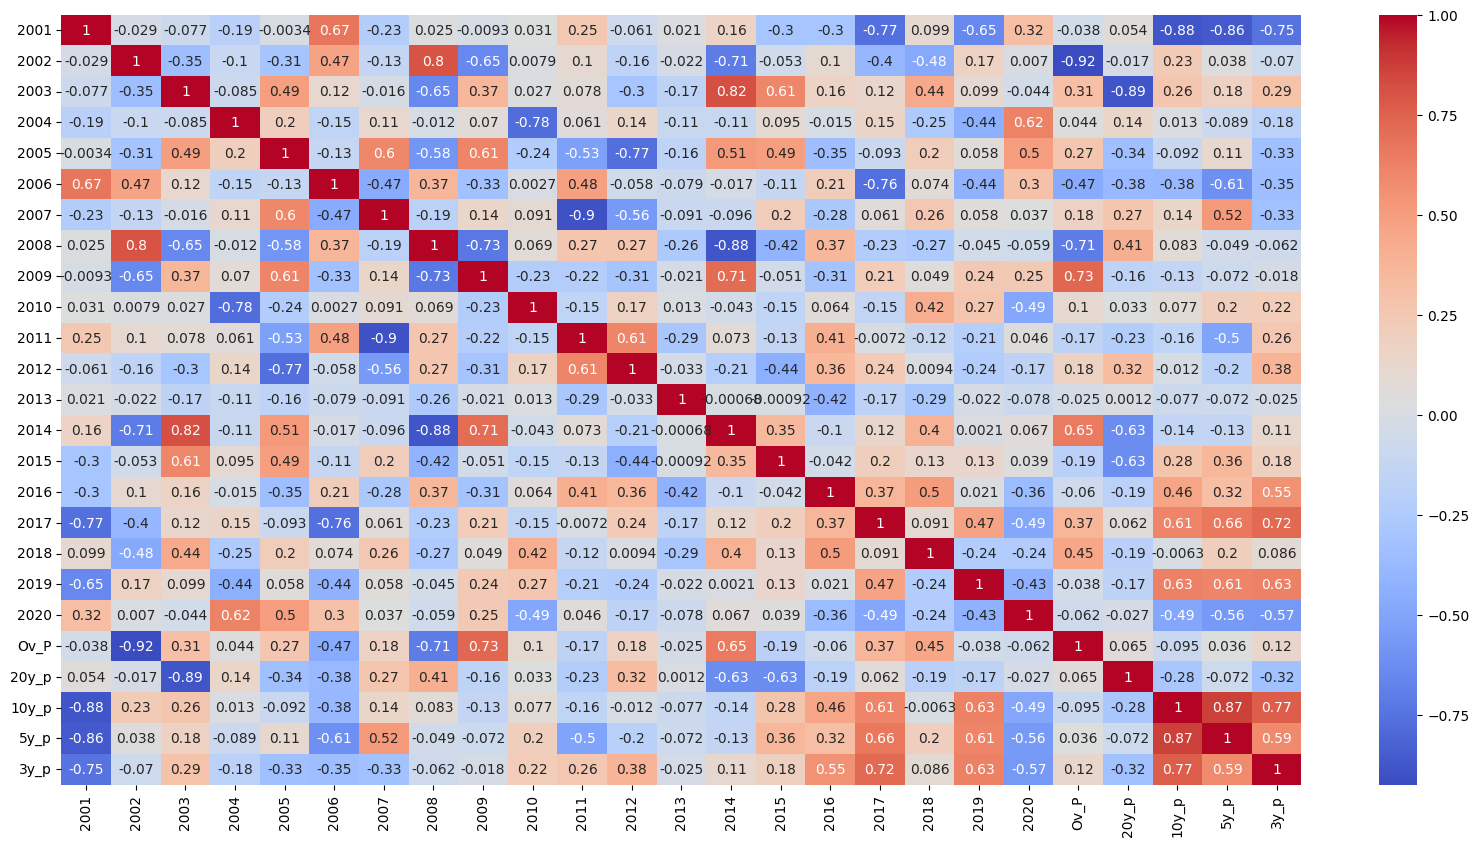

In [34]:
# Heatmap corr fra gli anni
corr_data = df1.pct_change().corr(method='pearson')
sns.heatmap(corr_data,annot=True,cmap='coolwarm')
plt.gcf().set_size_inches(20, 10)

# Considerazioni
SHORT da 9 a 11 (ottobre - dicembre)

da testare

In [101]:
case=0
counter = 0
for m_i in range(1,10,1):
    #m_i = 9
    m_f = m_i + 3
    for year in range(1,23):
        performance = 0
        my_list = df_corr.T.round(2).iloc[year,m_i:m_f]
        capital = 100
        for perf_month in my_list:
            performance += perf_month
        case+=1
        if performance <=0:
            counter+=1
        #print(f"la performance del test nell anno {year+1998} é {performance}")
    print('Percentuale di successo tra mese {} e {} è {:.2f}'.format(m_i,m_f,counter/case))

Percentuale di successo tra mese 1 e 4 è 0.41
Percentuale di successo tra mese 2 e 5 è 0.43
Percentuale di successo tra mese 3 e 6 è 0.42
Percentuale di successo tra mese 4 e 7 è 0.44
Percentuale di successo tra mese 5 e 8 è 0.47
Percentuale di successo tra mese 6 e 9 è 0.47
Percentuale di successo tra mese 7 e 10 è 0.44
Percentuale di successo tra mese 8 e 11 è 0.42
Percentuale di successo tra mese 9 e 12 è 0.42


i_x = 100.0
x = x*-1.8 + i_x
x = (x*  1.15)+ x
x = x*-0.47 + x
x_f = ((x_i - x_f)/ x_i ) * 100
x_f

In [82]:
df_corr.T.pct_change().iloc[1,:]

0    -5.298246
1    -1.990099
2     0.978610
3    -1.963816
4    -2.828571
5    -0.922840
6    -1.377358
7    -4.636364
8    -1.040128
9    -1.888889
10    1.156134
11   -0.470588
Name: 1999, dtype: float64

In [36]:
df_corr.T.iloc[0]

0     0.057
1     0.101
2     0.187
3    -0.304
4    -0.070
5     0.324
6    -0.636
7    -0.088
8     0.623
9    -0.225
10   -0.269
11    0.085
Name: 1998, dtype: float64

In [37]:
#Corr tra la media dei risultati mensili con i singoli risultati
for i in range(11):
    r = np.corrcoef(df_corr.T.iloc[i], my_list)
    print((r[0][1]).round(2))

0.41
0.1
-0.2
0.52
0.42
-0.13
0.8
0.06
0.31
0.39
0.2


In [38]:
#Controllare la corr tra i singoli mesi con il mese medio.
#Estrapolare la percentuale di casi nel quale si verifica una correlazione maggiore 